<a href="https://colab.research.google.com/github/OptimalDecisions/sports-analytics-foundations/blob/main/data-visualization/Data_Visualization_3_6_Cricket_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Data Visualization



  # Customizing Cricket Plots
  
  <img src = "../img/sa_logo.png" width="100" align="left">

  Ram Narasimhan

  <br><br><br>

  << [3.0 Visualization Overview](Data_Visualization_3_0_Overview.ipynb) | [3.1 Visualization Using Pandas](Pandas_Intermediate_2_10_GroupBy.ipynb)  |
  [3.2 Matplotlib Basics](Data_Visualization_3_2_Matplotlib_Basics.ipynb) >>




Concepts covered in this notebook:

1. Worm Plot (ball by Ball)
2. Manhattan Plot (Over by Over)




Matplotlib's strength is in how we can customize various aspects of a base plot.

We can modify the different default parameters to create visually appealing and informative visualizations.


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### 0 Get the Data Ready


In [9]:
import os
os.listdir('/content')


['.config', '1384410.csv', 'sample_data']

In [10]:
csv_files = []
for file in os.listdir('/content'):
  if file.endswith('.csv'):
    csv_files.append(file)

print(csv_files)


['1384410.csv']


In [11]:
df = pd.read_csv(csv_files[0])

In [12]:

df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [13]:
df.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object


Let's make a new column called `wicket` based on the  'wicket_type' column. If `wicket_type` is nan, the new column should have `0`, else `1`


Let's make a new column called `wicket` based on the  'wicket_type' column. If `wicket_type` is nan, the new column should have `0`, else `1`


In [14]:
def prepare_ball_df(df):

  columns_for_worm_plot = ['innings', 'ball', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'wicket_type']
  df = df[columns_for_worm_plot].copy()

  # Ball count, by Innings
  df['_ball'] = 1
  df['ball_num'] = df.groupby(['innings'])['_ball'].cumsum()

  df['over'] = df['ball'].astype(int)+1

  # Runs per ball, and cumulative total runs by Innings
  df['runs'] = df['runs_off_bat'].fillna(0) + df['extras'].fillna(0)
  df['total'] = df.groupby(['innings'])['runs'].cumsum()

  # Wicket, yes or no?
  df['wicket'] = np.where(df['wicket_type'].isna(), 0, 1)


  return df[['innings', 'over', 'runs', 'ball_num', 'total', 'wicket']]

In [15]:
bdf = prepare_ball_df(df)

In [16]:
bdf[bdf['wicket']==1]

,innings,over,runs,ball_num,total,wicket
21,1,4,0,22,7,1
63,1,10,0,64,48,1
76,1,12,0,77,54,1
105,1,17,0,106,68,1
116,1,19,0,117,71,1
132,1,22,0,133,91,1
283,1,46,0,284,221,1
301,1,48,0,302,244,1
311,1,49,0,312,252,1
318,1,50,1,319,262,1


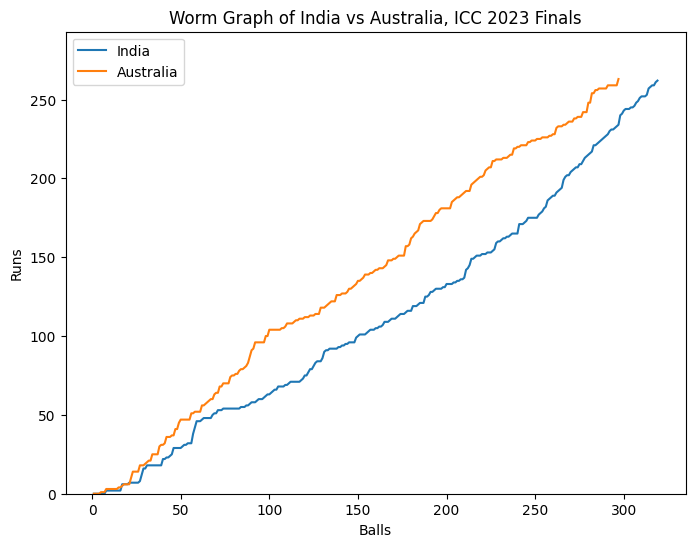

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
bp = bdf.groupby('innings').plot(x='ball_num', y='total', ax=ax)
plt.legend(labels = ['India', 'Australia'])
plt.title('Worm Graph of India vs Australia, ICC 2023 Finals')
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.ylim(0, bdf['total'].max() + 30)
plt.show()

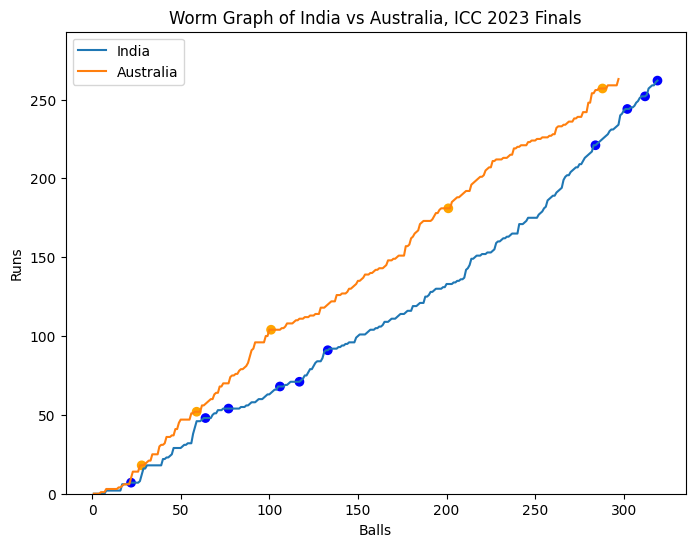

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
bp = bdf.groupby('innings').plot(x='ball_num', y='total', ax=ax)

#fall of wickets - as scatter plot dots
plt.scatter(x=bdf[bdf['wicket']==1]['ball_num'], y=bdf[bdf['wicket']==1]['total'],
            c=bdf[bdf['wicket']==1]['innings'].map({1:'blue', 2:'orange'}))

plt.legend(labels = ['India', 'Australia'])
plt.title('Worm Graph of India vs Australia, ICC 2023 Finals')
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.ylim(0, bdf['total'].max() + 30)
plt.show()


In [68]:
odf = bdf.groupby(['innings', 'over']).agg({'wicket': 'sum',
                                      'runs':'sum'
                                      }).reset_index()


In [69]:
odf

,innings,over,wicket,runs
0,1,1,0,0
1,1,2,0,2
2,1,3,0,4
3,1,4,1,1
4,1,5,0,9
...,...,...,...,...
94,2,45,0,6
95,2,46,0,12
96,2,47,1,3
97,2,48,0,2


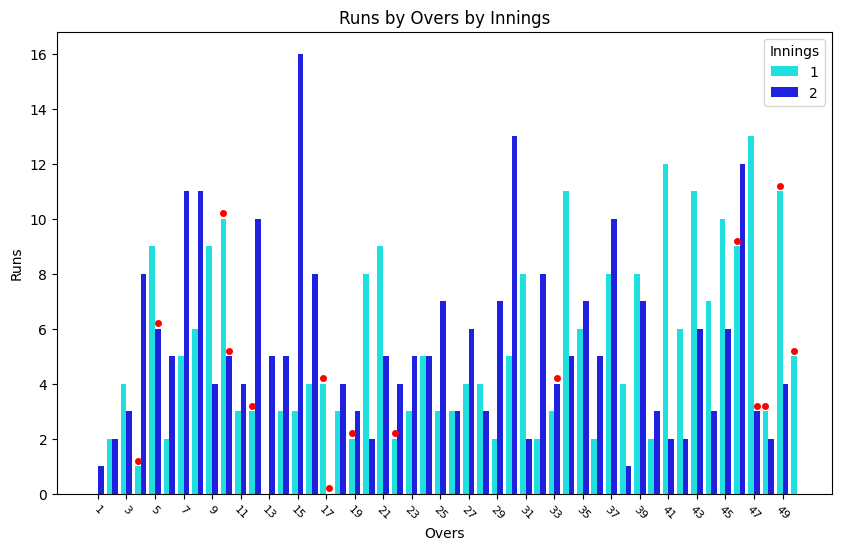

In [79]:
# prompt: to the plot above, add annotation on top of certain bars. If the 'wicket' column is nonzero, add the value in the 'wicket' column above the bar value

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='over', y='runs', hue='innings', data=odf,
            palette={1: 'cyan', 2: 'blue'})
plt.title('Runs by Overs by Innings')
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.legend(title='Innings')
plt.xticks(rotation=-45, fontsize=8)
# Show only alternate xticks
plt.xticks(ax.get_xticks()[::2])

# Add annotation on top of bar, if there was a wicket in that over
for p, wicket in zip(ax.patches, odf['wicket']):
    if wicket:
      yht = p.get_height()
      for w in range(wicket): #there could be more than 1 wkt
        ax.plot(p.get_x() + p.get_width() / 2., p.get_height()+0.2 + w*0.5,
                marker='o', color='red', markersize=4)

plt.show()


get the team names, match date etc. (from INFO)
get subplots, one over another
